In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import dartwork_mpl

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dartwork_mpl.paper')

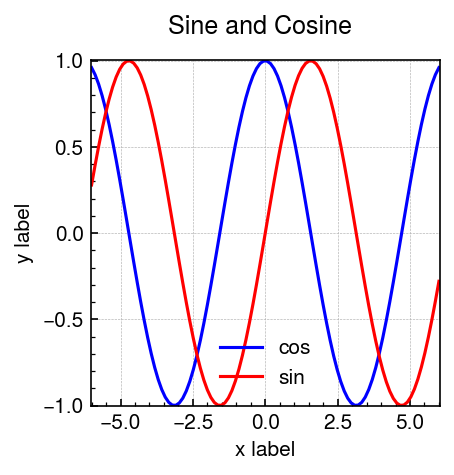

In [47]:
x = np.linspace(-6, 6, 100)
cos = np.cos(x)
sin = np.sin(x)

fig, ax = plt.subplots(figsize=(3, 3))

fig.suptitle('Sine and Cosine')
ax.plot(x, cos, color='blue', label='cos')
ax.plot(x, sin, color='red', label='sin')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.legend()